In [17]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression

# Fetch the stock data for Apple from Yahoo Finance
symbol = 'AAPL'
data = yf.download(symbol, start=(pd.Timestamp.today() - pd.DateOffset(years=3)).strftime('%Y-%m-%d'), end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# Extract the adjusted closing prices
prices = data['Adj Close']

# Calculate the daily returns
returns = prices.pct_change().fillna(0)

# Filter data for the last three years
returns = returns[-(3*252):]  # Assuming 252 trading days in a year

# Create the feature matrix X and target variable y
X = pd.DataFrame({'Days': range(len(returns))})
y = returns.values

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the next six months of returns
future_X = pd.DataFrame({'Days': range(len(returns), len(returns) + 6 * 21)})  # Assuming 21 trading days in a month
predicted_returns = model.predict(future_X)

# Create dates for the next six months
next_six_months = pd.date_range(start=prices.index[-1], periods=6*21, freq='B')

# Calculate the expected future stock values
start_price = prices.iloc[-1]  # Last available stock price
future_prices = (1 + predicted_returns) * start_price

# Combine the dates and future prices
future_data = pd.DataFrame({'Date': next_six_months, 'Expected Future Price': future_prices})

print(future_data)


[*********************100%***********************]  1 of 1 completed
          Date  Expected Future Price
0   2023-05-26             175.414671
1   2023-05-29             175.414042
2   2023-05-30             175.413414
3   2023-05-31             175.412785
4   2023-06-01             175.412156
..         ...                    ...
121 2023-11-13             175.338612
122 2023-11-14             175.337984
123 2023-11-15             175.337355
124 2023-11-16             175.336727
125 2023-11-17             175.336098

[126 rows x 2 columns]


[*********************100%***********************]  1 of 1 completed


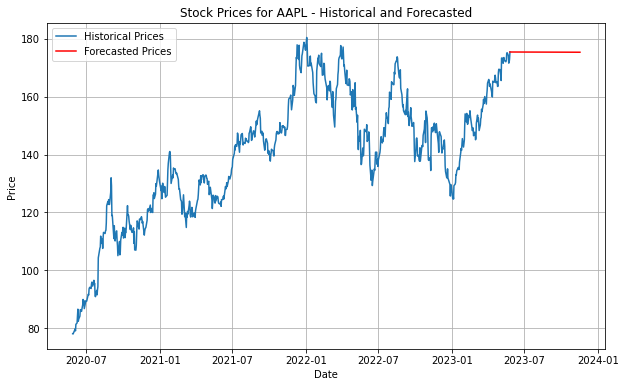

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Fetch the stock data for Apple from Yahoo Finance
symbol = 'AAPL'
data = yf.download(symbol, start=(pd.Timestamp.today() - pd.DateOffset(years=3)).strftime('%Y-%m-%d'), end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# Extract the adjusted closing prices
prices = data['Adj Close']

# Calculate the daily returns
returns = prices.pct_change().fillna(0)

# Filter data for the last three years
returns = returns[-(3*252):]  # Assuming 252 trading days in a year

# Create the feature matrix X and target variable y
X = np.arange(len(returns)).reshape(-1, 1)
y = returns.values

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the next six months of returns
future_X = np.arange(len(returns), len(returns) + 6 * 21).reshape(-1, 1)  # Assuming 21 trading days in a month
predicted_returns = model.predict(future_X)

# Create dates for the next six months
next_six_months = pd.date_range(start=prices.index[-1], periods=6 * 21, freq='B')

# Calculate the expected future stock prices
start_price = prices.iloc[-1]  # Last available stock price
future_prices = (1 + predicted_returns) * start_price

# Combine the dates and future prices
future_data = pd.DataFrame({'Date': next_six_months, 'Expected Future Price': future_prices})

# Plot the historical and forecasted prices
plt.figure(figsize=(10, 6))
plt.plot(list(prices.index), list(prices), label='Historical Prices')
plt.plot(list(future_data['Date']), list(future_data['Expected Future Price']), label='Forecasted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Stock Prices for {symbol} - Historical and Forecasted')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
print(df)

          Date  Expected Future Price
0   2023-05-26             175.414671
1   2023-05-29             175.414042
2   2023-05-30             175.413413
3   2023-05-31             175.412785
4   2023-06-01             175.412156
..         ...                    ...
121 2023-11-13             175.338612
122 2023-11-14             175.337984
123 2023-11-15             175.337355
124 2023-11-16             175.336726
125 2023-11-17             175.336098

[126 rows x 2 columns]


In [28]:
pd.DataFrame(future_data)

,Date,Expected Future Price
0,2023-05-26,175.414671
1,2023-05-29,175.414042
2,2023-05-30,175.413413
3,2023-05-31,175.412785
4,2023-06-01,175.412156
...,...,...
121,2023-11-13,175.338612
122,2023-11-14,175.337984
123,2023-11-15,175.337355
124,2023-11-16,175.336726


In [27]:
Print(df)

NameError: name 'Print' is not defined